<table class="ee-notebook-buttons" align="left"><td>
<a target="_blank"  href="https://colab.research.google.com/drive/1Ql88wX6Ucjot4BZrHTqeV2V-Hc5bDqMN#scrollTo=WfzIAI-J6TEO">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>
</td><td>
<a target="_blank"  href="https://github.com/biagiominio/Remote_sensing_2021/blob/main/R_code_remote_sensing_first.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td></table>

# Raster data manipulation
The [raster](https://www.rdocumentation.org/packages/raster/versions/3.4-5) package provides classes and functions to manipulate geographic (spatial) data in "raster" format. Raster data divides space into cells (rectangles; pixels) of equal size (in units of the coordinate reference system). Such continuous spatial data are also referred to as "grid" data, and be contrasted with discrete (object based) spatial data (points, lines, polygons).

## Introduction
Use the [install.packages](https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/install.packages) function to download and install packages from CRAN-like repositories or local files.



In [ ]:
install.packages("raster")


Use the [library](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/library) function to load previously installed packages.

In [25]:
library(raster)

### Upload file manually
* Download the image of the Parakanã Indigenous Reserve in the state of Pará (northern region of Brazil) using Landsat [data](https://drive.google.com/drive/folders/1buaEhfQgOdV6AxXvV6NKQi6PAQjknyNi?usp=sharing) from 2011.

* On the left side of Google Colab click on the small folder icon named file ⇒ click the Upload icon ⇒ choose the files to upload from your Downloads folder and click OK ⇒ your files are now on Google Colab!

Use the [setwd](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/getwd) function to set the current working directory of the R process.

In [28]:
setwd("/content")

Use the [brick](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/brick) function to create a RasterBrick object (a multi-layer raster object).

In [ ]:
p224r63_2011 <- brick("p224r63_2011_masked.grd")

Explore the properties of the `p224r63_2011` object.

In [31]:
p224r63_2011

class      : RasterBrick 
dimensions : 1499, 2967, 4447533, 7  (nrow, ncol, ncell, nlayers)
resolution : 30, 30  (x, y)
extent     : 579765, 668775, -522705, -477735  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=22 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
source     : /content/p224r63_2011_masked.grd 
names      :       B1_sre,       B2_sre,       B3_sre,       B4_sre,       B5_sre,        B6_bt,       B7_sre 
min values : 0.000000e+00, 0.000000e+00, 0.000000e+00, 1.196277e-02, 4.116526e-03, 2.951000e+02, 0.000000e+00 
max values :    0.1249041,    0.2563655,    0.2591587,    0.5592193,    0.4894984,  305.2000000,    0.3692634 


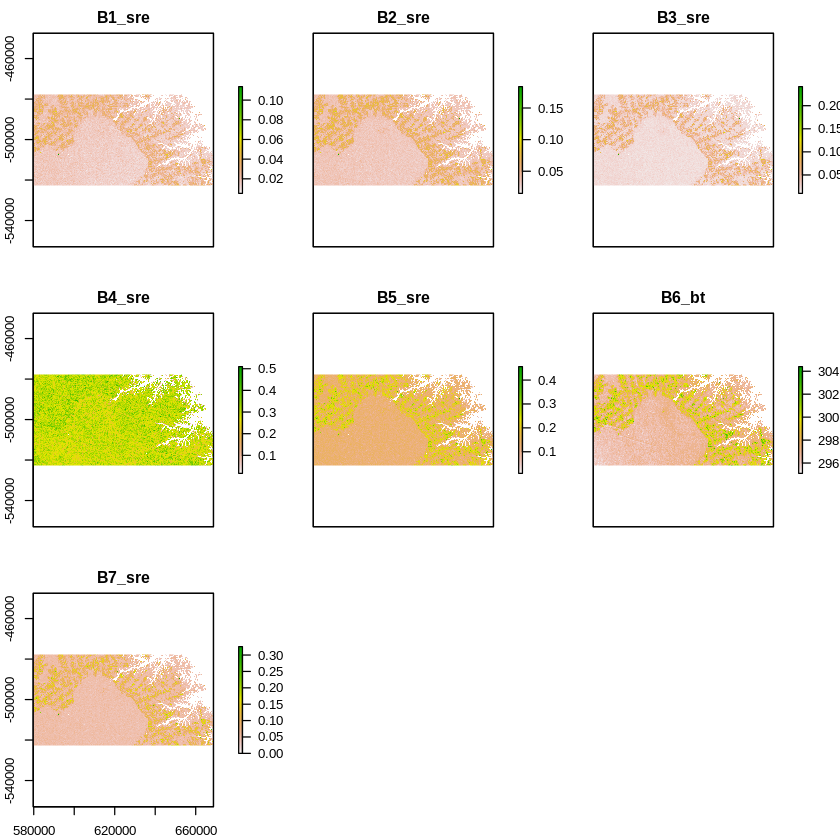

In [27]:
plot(p224r63_2011)

In [ ]:
# colour change
cl <- colorRampPalette(c("black","grey","light grey")) (100)
plot(p224r63_2011, col=cl)

In [ ]:
# colour change -> new
cl <- colorRampPalette(c("blue","green","grey","red","magenta","yellow")) (100)
plot(p224r63_2011, col=cl)


In [ ]:
#### DAY 3
# Bande Landsat
# B1: blu
# B2: verde
# B3: rosso
# B4: infrarosso vicino
# B5: infrarosso medio
# B6: infrarosso termico
# B7: infrarosso medio
# dev.off will clean the current graph
# dev.off()
plot(p224r63_2011$B1_sre)


In [ ]:
cls <- colorRampPalette(c("red","pink","orange","purple")) (200)
plot(p224r63_2011$B1_sre, col=cls)


In [ ]:
plot(p224r63_2011$B1_sre)


In [ ]:
plot(p224r63_2011$B2_sre)


In [ ]:
# 1 row, 2 columns
par(mfrow=c(1,2))
plot(p224r63_2011$B1_sre)
plot(p224r63_2011$B2_sre)


In [ ]:
# 2 row, 1 columns
par(mfrow=c(2,1)) # if you are using columns first: par(mfcol....)
plot(p224r63_2011$B1_sre)
plot(p224r63_2011$B2_sre)


In [ ]:
# plot the first four bands of Landsat
par(mfrow=c(4,1))
plot(p224r63_2011$B1_sre)
plot(p224r63_2011$B2_sre)
plot(p224r63_2011$B3_sre)
plot(p224r63_2011$B4_sre)

In [ ]:
# a quadrat of bands...:
par(mfrow=c(2,2))
plot(p224r63_2011$B1_sre)
plot(p224r63_2011$B2_sre)
plot(p224r63_2011$B3_sre)
plot(p224r63_2011$B4_sre)

In [ ]:
# a quadrat of bands...:
par(mfrow=c(2,2))
clb <- colorRampPalette(c("dark blue","blue","light blue")) (100)
plot(p224r63_2011$B1_sre, col=clb)
clg <- colorRampPalette(c("dark green","green","light green")) (100)
plot(p224r63_2011$B2_sre, col=clg)
clr <- colorRampPalette(c("dark red","red","pink")) (100)
plot(p224r63_2011$B3_sre, col=clr)
clnir <- colorRampPalette(c("red","orange","yellow")) (100)
plot(p224r63_2011$B4_sre, col=clnir)


In [ ]:
# Visualizing data by RGB plotting
# Bande Landsat
# B1: blu
# B2: verde
# B3: rosso
# B4: infrarosso vicino
# B5: infrarosso medio
# B6: infrarosso termico
# B7: infrarosso medio
plotRGB(p224r63_2011, r=3, g=2, b=1, stretch="Lin")
plotRGB(p224r63_2011, r=4, g=3, b=2, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=2, b=4, stretch="Lin")
# Exercise: mount a 2x2 multiframe
par(mfrow=c(2,2))
plotRGB(p224r63_2011, r=3, g=2, b=1, stretch="Lin")
plotRGB(p224r63_2011, r=4, g=3, b=2, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=2, b=4, stretch="Lin")


In [ ]:
# pdf("il_mio_primo_pdf_con_R.pdf")
# par(mfrow=c(2,2))
# plotRGB(p224r63_2011, r=3, g=2, b=1, stretch="Lin")
# plotRGB(p224r63_2011, r=4, g=3, b=2, stretch="Lin")
# plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="Lin")
# plotRGB(p224r63_2011, r=3, g=2, b=4, stretch="Lin")
# dev.off()
plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="hist")
# par natural colours, flase colours, and false colours with histogram stretching
par(mfrow=c(3,1))


In [ ]:
plotRGB(p224r63_2011, r=3, g=2, b=1, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="hist")


In [ ]:
sessionInfo()